In [1]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups # For fetching the dataset
from sklearn.feature_extraction.text import TfidfVectorizer # For converting text to TF-IDF features
from sklearn.model_selection import train_test_split # For splitting data into training and test sets
from sklearn.ensemble import RandomForestClassifier # For the Random Forest model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # For evaluating model performance

In [2]:
# Step 2: Load the 20 Newsgroups dataset
# We will use 'all' categories to include all 20 newsgroups
categories = None # None means all categories
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [3]:
# Step 3: Explore the dataset (optional)
# Print basic information to understand the data structure
print("Total documents:", len(newsgroups.data))
print("Target names:", newsgroups.target_names)
print("Sample document:", newsgroups.data[20])

Total documents: 18846
Target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Sample document: From: jackw@boi.hp.com (jack wood)
Subject: Re: Chevy/GMC 4x4 Fullsize Pickups, Opinions?
Distribution: na
Organization: Hewlett-Packard / Boise, Idaho
X-Newsreader: TIN [version 1.1.4 PL6]
Lines: 41

Dick Grady (grady@world.std.com) wrote:
: 
: I am considering buying a 1993 Chevy or GMC 4x4 full-size pickup with
: the extended cab.  Any opinions about these vehicles?  Have there been
: any significant problems?
: 
: -- 
: Dick Grady           Salem, NH,  USA            grady@world.std.com
: So many newsgroups, so little time!


I bought a brand

In [4]:
# Step 4: Convert the text data to TF-IDF features
# TfidfVectorizer transforms text into numerical features that can be used by ML models
v = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2) # Define TF-IDF parameters (there are almost 21 arguments can be passed
X = v.fit_transform(newsgroups.data) # Transform text data
y = newsgroups.target # Target labels (the newsgroup categories)

In [5]:
# Step 5: Split the dataset into training and test sets
# 80% training data, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 6: Initialize the Random Forest Classifier
# Set the number of estimators (trees) and random_state for reproducibility
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
# Step 7: Train the Random Forest model on the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Step 8: Make predictions on the test data
y_pred = rfc.predict(X_test)

In [9]:
# Step 9: Evaluate model performance
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%") # Multiply by 100 for percentage

Accuracy: 86.21%


In [10]:
# Step 10: Print the classification report for detailed metrics
CR = classification_report(y_test, y_pred, target_names=newsgroups.target_names)
print("Classification Report:\n", CR)

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.90      0.84      0.87       151
           comp.graphics       0.72      0.82      0.77       202
 comp.os.ms-windows.misc       0.74      0.88      0.80       195
comp.sys.ibm.pc.hardware       0.67      0.69      0.68       183
   comp.sys.mac.hardware       0.89      0.84      0.87       205
          comp.windows.x       0.91      0.80      0.85       215
            misc.forsale       0.80      0.81      0.81       193
               rec.autos       0.88      0.88      0.88       196
         rec.motorcycles       0.94      0.93      0.93       168
      rec.sport.baseball       0.92      0.93      0.93       211
        rec.sport.hockey       0.90      0.98      0.94       198
               sci.crypt       0.95      0.95      0.95       201
         sci.electronics       0.88      0.71      0.79       202
                 sci.med       0.88      0.89      

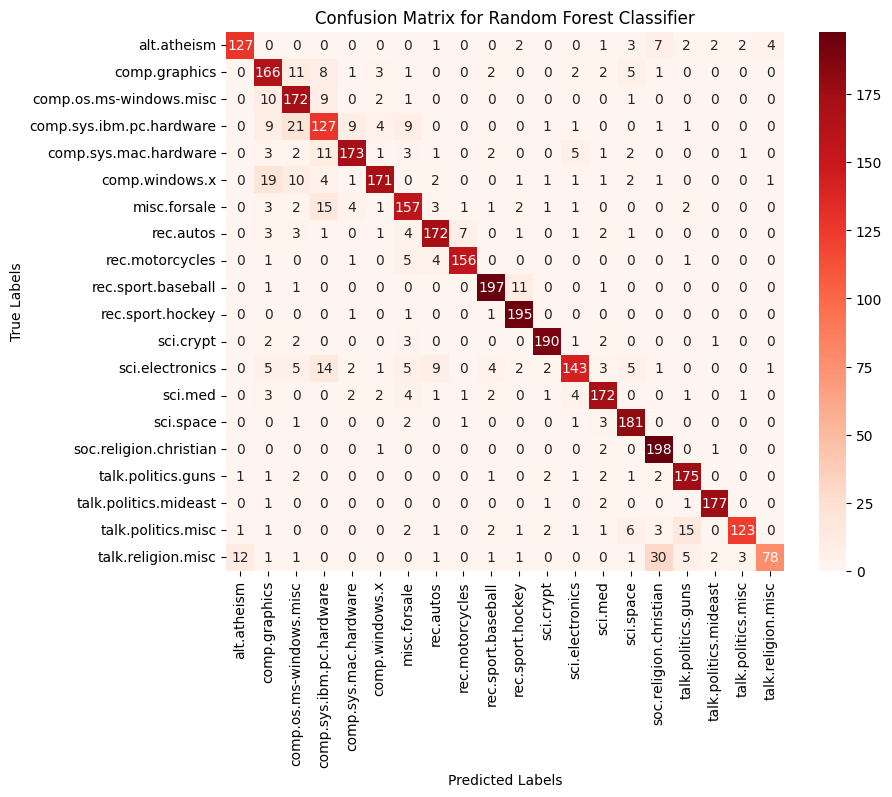

In [11]:
# Step 11: Plot a confusion matrix for the test set predictions
# This will show the classification performance for each class
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

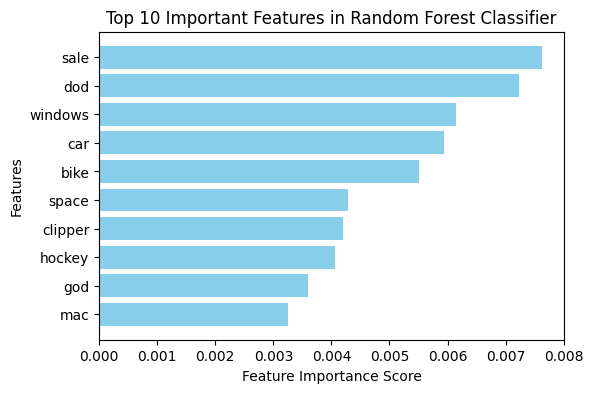

In [12]:
# Step 12: Plot feature importance
# Random Forest allows us to inspect feature importance, which can help understand model focus areas
imp = rfc.feature_importances_
inx = np.argsort(imp)[-10:] # Top 10 important features
top_features = [v.get_feature_names_out()[i] for i in inx]

plt.figure(figsize=(6, 4))
plt.barh(range(len(top_features)), imp[inx], color='skyblue')
plt.yticks(range(len(top_features)), top_features)
plt.title("Top 10 Important Features in Random Forest Classifier")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

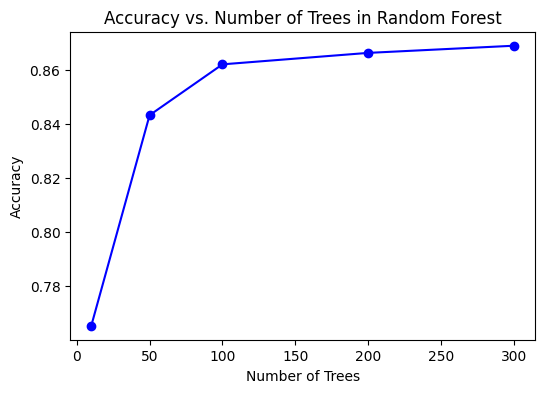

In [14]:
# Step 13: Plot the accuracy trend by number of trees in Random Forest
# This helps determine if adding more trees would improve the model's performance
tree_counts = [10, 50, 100, 200, 300]
accuracies = []
for n_trees in tree_counts:
    rf_temp = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(6, 4))
plt.plot(tree_counts, accuracies, marker='o', color='b')
plt.title("Accuracy vs. Number of Trees in Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()